# To calculate the exponential using Taylor Series


## Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define factorial function

In [2]:
def factorial(y):
    """
    Calculate factorial of input
    eg. y*(y-1)*(y-2)*(y-3).........(y-y)
    """
    assert y >= 0, "Factoriall is only defined for positive value"
    factor = 1
    for i in range(1,y+1):
        i = float(i)
        factor = factor*i
    return factor

## Define myexp function

In [3]:
def expCal(x,n=100,convergence = False):
    """
    Exponential function expCalArray()
    Array Algorithm
    Inputs
    x: the number whose exp is to be calculated
    n: (default n=100) number of terms to calculate the value of function in taylor series.
    convergence: in order to print the convergence set convergence = True
    """
    assert n > 0, "Number of terms should be Positive and Not Eqaul to zero"
    x = np.array(x)
    n = n-1
    A = np.zeros((x.size,n+1))
    A[:,0] = 1
    low = range(1,n+1)
    high = range(n,0,-1)
    count = 0
    for k in np.nditer(x):
        k = float(k)
        for i,j in zip(low,high):
            A[count][i] = k**i/factorial(i)
            A[count][j] = k**j/factorial(j)
            if i>=j:
                break
        count = count+1

    result = np.sum(A,1)
    # print(f"error is equal to {np.exp(x)-result}")
    if convergence:
        import matplotlib.pyplot as plt
        filter = np.ravel(A)
        filter = abs(np.convolve(filter,[1,-1],'same'))
        ranges = range(1,filter.size +1) 
        fig, ax = plt.subplots()
        ax.plot(ranges,filter,label='Convergence')
        plt.legend()
        plt.show()
         
    return result


In [4]:
def plotting():
        import matplotlib.pyplot as plt
        """
        To see plot between custom and numpy exponential function 
        """
        ranges = np.linspace(1,100,1000)
        myExpCal = expCal(ranges)
        numpyExpCal = np.exp(ranges)

        fig, ax = plt.subplots()
        ax.plot(ranges,numpyExpCal,label='Numpy Exp')
        ax.scatter(ranges,myExpCal,color='C1',label='Custom Exp')
        plt.legend()
        plt.show()

## Computational Cost of Numpy exp

In [5]:
%timeit np.exp(20)

1.34 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Computational Cost of Custom Exp

In [6]:
%timeit expCal(20)

490 µs ± 6.89 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Plot between numpy exp and custom exp

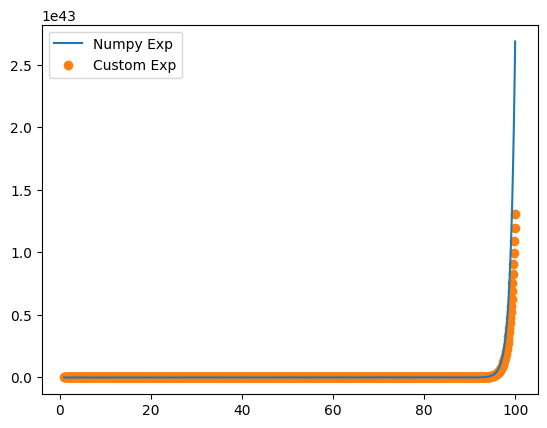

In [7]:
plotting()